## Task -1 Anomaly detection
## Student ID:206240301
Matan-Ben Nagar

### some notes: you can install Anaconda (python 3 prefered)
#### We will use Pandas, Numpy, and SKLEARN ( they are part of Anaconda distribution)

In [42]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


## Read the data

Read the results data and count how many anomalies were found 

In [43]:
# file path - this for linux windows you will need "//"
f_path = r"conn250K_anomaly.csv"

'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df_example = pd.read_csv(f_path,names=['record ID','anomaly'], header=None)
print(df_example['anomaly'].value_counts())

0    255648
1      1022
Name: anomaly, dtype: int64


In [44]:
# file path - this for linux windows you will need "//"
f_path = r"conn250K.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [45]:
# we could have nan values in the dataset (issue in the data) lets dropna()
df

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


Get the head of the data

In [46]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


# # Pandas DataFrame

A.  Handling missing data

In [47]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))


record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

B. Remove na/nan: 
##The Pandas function dropna() drops rows or columns (depending on the parameter you choose) that contain missing values. This function takes the axis parameter which you set as 0 to drop rows, and 1 to drop columns.

Please note that:

The alternative function is fillna() . This function will replace missing values with the value of your choice. You can replace with a fixed value such as 0, or you can use a calculation such as the mean. You can also apply different values to different columns by passing a dictionary of values per column.

In [48]:
df = df.dropna()


In [49]:
df.shape

(256670, 4)

The below code fills any missing values with the mode for that column. We used fil when we have features that do not have all placement in all cases.

In [50]:
# df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

F. Dataset statistics calculations

In [51]:
#Mean: The mean is the arithmetic average of a set of given numbers
df['dst_bytes'].mean()

4473.532613862158

In [52]:
#Median of two seperate columns
#The median is the middle score in a set of given numbers.
df[["src_bytes", "dst_bytes"]].median()

src_bytes     249.0
dst_bytes    1661.0
dtype: float64

# Isolation Forest

Isolation forest is one of the most efficient algoirthms for outlier detection especially in high demensional datasets.
<br>
The model builds a Random Forest in which each Decision Tree is grown randomly.<br>
At each node it picks a fearure randomly and then a random threshold value (between min and max) to split the dataset in two. <br>
As the dataset get gradually chopped into pieces, each observation gets isolated from others.<br>
Anomalies are far from the others therfore they get to be isolated in less steps than normal observations.

## Train Data

In [54]:
 %%time
model = IsolationForest(contamination = contamination, n_estimators = 200)
model.fit(data)

Wall time: 26.3 s


IsolationForest(contamination=0.003999, n_estimators=200)

In [55]:
df["iforest"] = pd.Series(model.predict(data))
df["iforest"] = df["iforest"].map({1:0, -1:1})
print(df["iforest"].value_counts())

0    256476
1       194
Name: iforest, dtype: int64


In [56]:
df

,record ID,duration_,src_bytes,dst_bytes,iforest
0,1,0,236,1228,0
1,2,0,239,486,0
2,3,0,234,1364,0
3,4,0,239,1295,0
4,5,0,181,5450,0
...,...,...,...,...,...
256665,256666,0,306,236,0
256666,256667,0,288,4017,0
256667,256668,0,289,1096,0
256668,256669,0,198,2169,0


Label encode : take any type of data and convert to numeric

In [57]:
# for col in data.columns:
#     if data[col].dtype == "object":
#         le = LabelEncoder()
#         le.fit(list(data[col].astype(str).values))
#         data[col] = le.transform(list(data[col].astype(str).values))
#     else:
#         data[col]

# Testing

in this section I will try and change different variables of the Isolation Forest algorithm to see how much the result is similar to the answers file we were given

<b> I don't recommand running this section, it will take too much and is not the answer itself </b> 

## modify n_estimators variable

In [102]:
# %%time
for x in range(10):
    model = IsolationForest(contamination = contamination, n_estimators = (x+1)*100)
    model.fit(data)
#     %%time
    df["iforest"] = pd.Series(model.predict(data))
    df["iforest"] = df["iforest"].map({1:0, -1:1})
    print("n_estimators:",(x+1)*100)
    print(df["iforest"].value_counts())

n_estimators: 100
0    254104
1      2566
Name: iforest, dtype: int64
n_estimators: 200
0    254105
1      2565
Name: iforest, dtype: int64
n_estimators: 300
0    254106
1      2564
Name: iforest, dtype: int64
n_estimators: 400
0    254104
1      2566
Name: iforest, dtype: int64
n_estimators: 500
0    254103
1      2567
Name: iforest, dtype: int64


KeyboardInterrupt: 

## modify contamination

Contamination is an important parameter here and I have arrived at its value based on trial and error on validating its results with outliers in 2D plot

In [73]:
contamination = 0.000999
for x in range(10):
    contamination += 0.001
    model = IsolationForest(contamination = contamination, n_estimators = 200)
    model.fit(data)
#     %%time
    df["iforest"] = pd.Series(model.predict(data))
    df["iforest"] = df["iforest"].map({1:0, -1:1})
    print("contamination:",(contamination))
    print(df["iforest"].value_counts())

KeyboardInterrupt: 

## VISUALIZATION

as an attempt to visualize the data and according to it conclude if the model it working appropriately 

In [58]:
df.head()

,record ID,duration_,src_bytes,dst_bytes,iforest
0,1,0,236,1228,0
1,2,0,239,486,0
2,3,0,234,1364,0
3,4,0,239,1295,0
4,5,0,181,5450,0


In [61]:
metrics_df=pd.pivot_table(df,values='dst_bytes',index='record ID',columns='src_bytes')
metrics_df.reset_index(inplace=True)
metrics_df.fillna(0,inplace=True)
metrics_df

src_bytes,record ID,0,51,137,138,139,140,141,142,143,...,51100,51180,51992,52560,53168,53208,53452,53776,54060,54540
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256665,256666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256666,256667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256667,256668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256668,256669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
metrics_df.columns
#specify the 12 metrics column names to be modelled
to_model_columns=metrics_df.columns[1:13]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=200,  contamination=float(.003999), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(metrics_df[to_model_columns])
pred = clf.predict(metrics_df[to_model_columns])
metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(metrics_df['anomaly'].value_counts())

 1    255658
-1      1012
Name: anomaly, dtype: int64


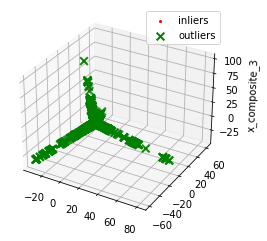

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(metrics_df[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="red")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="green", label="outliers")
ax.legend()
plt.show()

# 2D

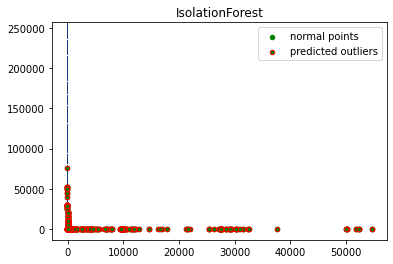

In [65]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(metrics_df[to_model_columns])
res=pd.DataFrame(pca.transform(metrics_df[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

## My answer according to the findings above

<b> The way I tested the data was to train the model with different variables (n_estimators, contamination). <br> After each loop I would compare the number of anomalies detected in the answer file to the number of anomalies determined by the IsolationForest <br> after a while the results came back pretty similar to each other (which can be seen by the confusion matrix </b>

In [53]:
from sklearn.ensemble import IsolationForest
# find approxamitely number of anomalies
contamination = 0.003999
#take relevant data
data = df[["duration_", "src_bytes","dst_bytes"]]

In [54]:
 %%time
model = IsolationForest(contamination = contamination, n_estimators = 200)
model.fit(data)

Wall time: 26.3 s


IsolationForest(contamination=0.003999, n_estimators=200)

In [55]:
df["iforest"] = pd.Series(model.predict(data))
df["iforest"] = df["iforest"].map({1:0, -1:1})
print(df["iforest"].value_counts())

0    256476
1       194
Name: iforest, dtype: int64


In [56]:
df

,record ID,duration_,src_bytes,dst_bytes,iforest
0,1,0,236,1228,0
1,2,0,239,486,0
2,3,0,234,1364,0
3,4,0,239,1295,0
4,5,0,181,5450,0
...,...,...,...,...,...
256665,256666,0,306,236,0
256666,256667,0,288,4017,0
256667,256668,0,289,1096,0
256668,256669,0,198,2169,0


Label encode : take any type of data and convert to numeric

In [57]:
# for col in data.columns:
#     if data[col].dtype == "object":
#         le = LabelEncoder()
#         le.fit(list(data[col].astype(str).values))
#         data[col] = le.transform(list(data[col].astype(str).values))
#     else:
#         data[col]

## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, plot_confusion_matrix

print(confusion_matrix(df_example['anomaly'], df['iforest']))

print("")

print(classification_report(df_example['anomaly'], df['iforest']))

print('Accuracy Score of IsolationForest is {}'.format(accuracy_score(df_example['anomaly'],df['iforest'])))


[[255477    171]
 [   999     23]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255648
           1       0.12      0.02      0.04      1022

    accuracy                           1.00    256670
   macro avg       0.56      0.51      0.52    256670
weighted avg       0.99      1.00      0.99    256670

Accuracy Score of IsolationForest is 0.9954416176413293


In [ ]:
# df
# df.to_csv('res.csv',sep='\t')
df1 = df[['record ID','my_ans']]
df1['true_ans'] = df_example[["anomaly"]]
df1.to_csv('res.csv', index=False,sep='\t')